In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt

In [2]:
#Upload the data
onetwo_df = pd.read_csv('ca_san_francisco_2020_04_01.csv', low_memory = False)

In [3]:
#Find the maximum and minimum dates (analysis)
dates = [dt.datetime.strptime(date,"%Y-%m-%d").date() for date in onetwo_df['date']]

In [5]:
##Data organization for % of searches per race as a fraction of total searches
df = onetwo_df.groupby(['subject_race', 'search_conducted']).count()
df_search = df[['arrest_made', 'citation_issued', 'warning_issued']].copy()
true_search = df_search.query('search_conducted == True').copy()

total_search = sum(true_search['arrest_made'])
test = true_search.loc['asian/pacific islander']['arrest_made']
true_search['% searched'] = true_search['arrest_made']/total_search


search_df = true_search[['arrest_made']].copy()

In [7]:
##Data organization for % of stops per race as a fraction of total stops
df_stops = onetwo_df.groupby('subject_race').count()
total_stops = sum(df_stops['date'])
df_stops['% stopped'] = df_stops['date'] / total_stops

In [11]:
#Create a dictionary that shows the counts of traffic stops by citations, warnings, and arrests (searches were included later in the code)
    #Further categorize by demographic
counts = []

outcome = onetwo_df['outcome']
race = onetwo_df[ 'subject_race']
sex = onetwo_df['subject_sex']
district = onetwo_df['district']

data = onetwo_df['outcome'].value_counts()
categories = data.index

race.value_counts()['white']
#grab the citations and the race:
citations = onetwo_df[onetwo_df['outcome'] == 'citation']
warning = onetwo_df[onetwo_df['outcome'] == 'warning']
arrest = onetwo_df[onetwo_df['outcome'] == 'arrest']


ccounts = []
wcounts = []
acounts = []
outcomedict = {}
#parses the total counts of stop outcomes by race
stopcategories = ['warning', 'citation', 'arrest']
for cat in stopcategories:
    outcomedict[cat] = [len(race[(outcome == cat) & (race == 'white')]),
                     len(race[(outcome == cat) & (race == 'asian/pacific islander')]),
                     len(race[(outcome == cat) & (race == 'black')]),
                     len(race[(outcome == cat) & (race == 'hispanic')]) 
                    ]
    
racedict = {}


for cat in onetwo_df['subject_race'].value_counts().index:
    racedict[cat] = [len(race[(outcome == 'citation') & (race == cat)]),
                     len(race[(outcome == 'warning') & (race == cat)]),
                     len(race[(outcome == 'arrest') & (race == cat)])]

In [12]:
#x axis tick labels
xlabels = ['white', 'asian/pacific islander', 'black', 'hispanic']

In [13]:
#Take the relevant count information created earlier and
for i in xlabels:
    test = int(search_df.loc[i].values)
    racedict[i].append(test)

#Get rid of the unnecessary "other" category
racedict.pop('other')

[81438, 22830, 910]

In [14]:
stoplabels = ['citation','warning', 'search', 'arrest']

#switches the values of search and arrest so that the graph looks pretty
for i in racedict.keys():
    temp = racedict[i][3]
    racedict[i][3] = racedict[i][2]
    racedict[i][2] = temp

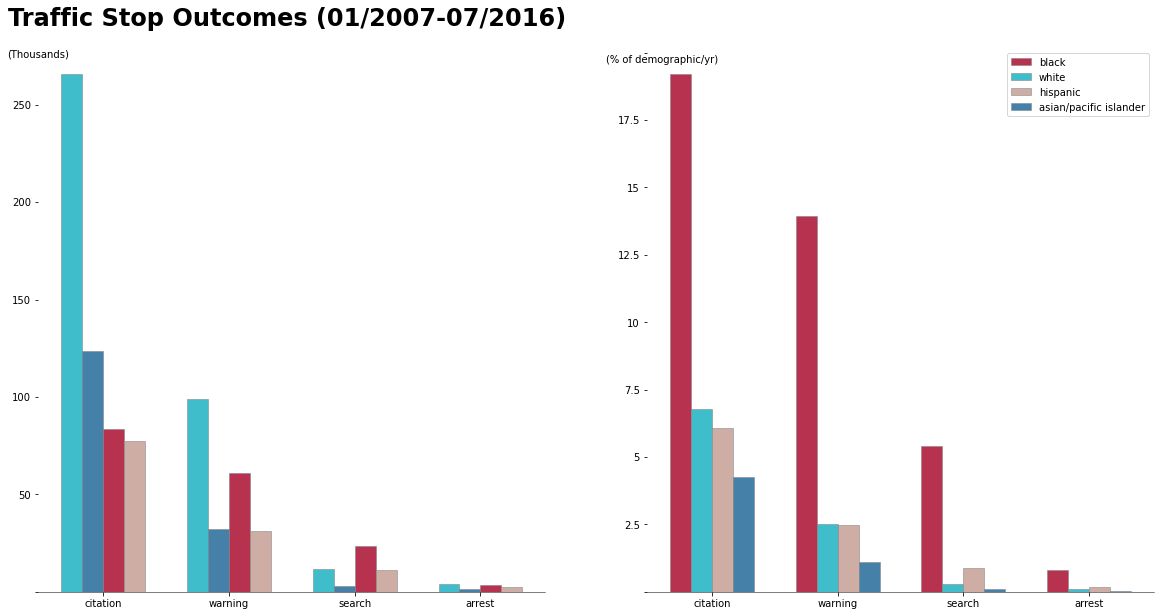

In [27]:
#Let's make these histogram plots!
fig, ax = plt.subplots(ncols = 2 , figsize=(20,10))


#Counts histogram
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False) 
ax[0].spines['left'].set_linewidth(False) 
ax[0].spines['bottom'].set_linewidth(.5)

order = [0, 1, 2, 4, 3]
colors = ['#3FBDCB','#4580A9', '#B6324F','#CEADA4']
for race in range(len(xlabels)):
    barcontainers = ax[0].bar(3*np.arange(0, 4) -.75 +race/2, racedict[xlabels[race]], width = 0.5, label = xlabels[race], color = colors[race])
    for rect in barcontainers.patches: 
        rect.set_linewidth(0.5) 
        rect.set_edgecolor('grey')
ax[0].set_xticks(3*np.arange(0,4))
ax[0].set_xticklabels(stoplabels)
ax[0].set_yticklabels([None, 50, 100, 150, 200, 250])
ax[0].set_ylabel('(Thousands)', rotation = 0)
ax[0].yaxis.set_label_coords(0, .98)


#peeps = {'white': '#F0F9E8', 'asian/pacific islander':'#BAE4BC', 'black': '#7BCCC4', 'hispanic':'#2B8CBE'}
#color_white =    '#F0F9E8' ---> ‘#3FBDCB’
#color_black =    '#7BCCC4' ---> '#B6324F’
#color_hispanic = '#2B8CBE' ---> ‘#CEADA4’
#color_asian =    '#BAE4BC' ---> ‘#4580A9’


propdict = racedict.copy()
propdict = {key:[i/(total[key])/9.5 for i in value] for key, value in propdict.items()}
#propdict2 = {key: [i/9.5 for i in value] for key, value in propdict.items()}

ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False) 
ax[1].spines['left'].set_linewidth(False) 
ax[1].spines['bottom'].set_linewidth(.5)

colors = ['#B6324F', '#3FBDCB', '#CEADA4', '#4580A9']
order = ['black', 'white', 'hispanic', 'asian/pacific islander']
for race in range(len(xlabels)):
    barcontainers = ax[1].bar(3*np.arange(0, 4) -.75 +race/2, propdict[order[race]], width = 0.5, label = order[race], color = colors[race])
    for rect in barcontainers.patches: 
        rect.set_linewidth(0.5) 
        rect.set_edgecolor('grey')
ax[1].set_ylabel('(% of demographic/yr)', rotation = 0)
ax[1].set_yticklabels([None, 2.5, 5, 7.5, 10, 12.5, 15, 17.5])
ax[1].yaxis.set_label_coords(.03, .97)
ax[1].set_xticks(3*np.arange(0,4))
ax[1].set_xticklabels(stoplabels)
ax[1].legend()

plt.title('Traffic Stop Outcomes (01/2007-07/2016)', x = -0.71, y = 1.03, weight = 'bold', fontsize = 24)
#plt.title('Traffic stop outcome rates as % in San Francisco (1/2007-7/2016)', x = 0.5, y = 1.02, weight = 'bold', fontsize=17)
#plt.show()



plt.savefig('traffic_stop_outcomes.png')